# <font color = Crimson size = 6> <b>Регрессионный анализ. <br> Коэффициенты ранговой корреляции</b> </font>

Не всегда понятна форма зависимости (Линейная? Гиперболическая? Экспоненциальная? Какая-то другая?). Эта форма бывает сложной, а то и вовсе не определима (в принципе). И вообще, мы можем исследовать не количественный, а некоторый качественный признак.

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

***
## <font color = DarkGreen size = 5> <b>Коэффициент ранговой корреляции Спирмена</b> </font>

##### <font color = SlateBlue size = 3> Пример </font>

**Имеются выборочные данные по $n=8$ студентам:**

| X | 12 | 9 | 8 | 14 | 15 | 11 | 10 | 15 |
|---|---|---|---|---|---|---|---|---|
| Y | 42 | 107 | 100 | 60 | 78 | 79 | 90 | 54 |

где, $X$ – количество прогулов за некоторый период времени, \
а $Y$ – суммарная успеваемость за этот период.

In [3]:
df = pd.DataFrame({'X': [12, 9, 8, 14, 15, 11, 10, 15],
                   'Y': [42, 107, 100, 60, 78, 79, 90 ,54]})

In [9]:
# линейный коэффициент корреляции
np.corrcoef(df.X, df.Y)[0,1]

-0.7193069877978744

Линейный коэффициент корреляции $r_{xy} \approx -0.72$, что говорит о сильной обратной корреляционной зависимости $Y$ – суммарной успеваемости от $X$ – количества прогулов.

Найдем [уравнение линейной регрессии](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/St_09_Linear%20regression.ipynb)

$\hat{y} = \beta_0 + \beta_1 x_i$

$\beta_1 = r \cfrac{\sigma_y}{\sigma_x}$ – **коэффициент регрессии** $Y$ на $X$\
$\beta_0 = m_y - r \cfrac{\sigma_y}{\sigma_x} m_x = m_y - \beta_1 m_x$ – **интерсепт**

In [4]:
n = df.shape[0]
Mx, My, SDx, SDy = df['X'].mean(), df['Y'].mean(), df['X'].std(), df['Y'].std()
r = np.corrcoef(df['X'],df['Y'])[0,1]

b1 = r * SDy / SDx
b0 = My - b1 * Mx
b0, b1

(147.3203883495146, -6.048543689320389)

In [5]:
y_pred = 147.32 + -6.0485 * df['X']

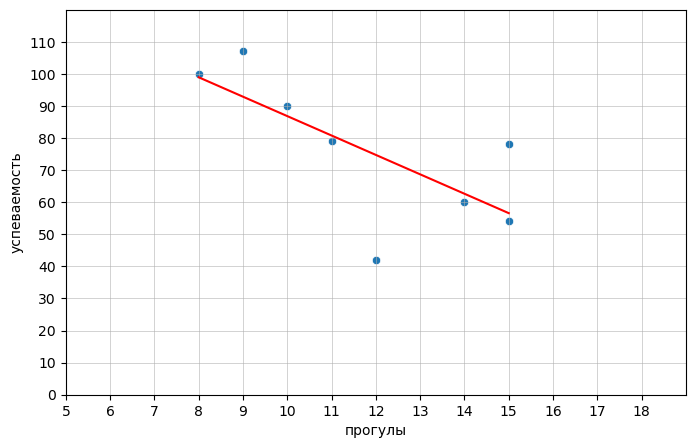

In [6]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='X', y='Y', data=df)
sns.lineplot(x=df.X, y=y_pred, color ='r')

plt.xlim([5,19])
plt.xticks(ticks=np.arange(5, 19))
plt.ylim([0,120])
plt.yticks(ticks=np.arange(0, 120, 10))
plt.xlabel('прогулы')
plt.ylabel('успеваемость')
plt.grid(linewidth=0.4);

У такого подхода могут быть изъяны. Во-первых, прогулы и успеваемость – это величины дискретные (прерывные), но мы приблизили их непрерывной функцией (линейной). И во-вторых, зависимость может быть гораздо более сложной. Когда прогулов немного, успеваемость, вероятно, падает несущественно; когда их количество растёт – ситуация начинает ухудшаться, и, наконец, с некоторого момента достижения стремительно падают. Возможно, удастся подобрать кривую, удачно приближающую точки, но у нас мало данных (8 наблюдений всего), и по чертежу сомнительно, что удастся.

**Поэтому в качестве альтернативы уместно рассмотреть ранговый подход.** \
Оценим тесноту связи между рангами. Для этого нужно вычислить коэффициент ранговой корреляции Спирмена $r_s$.

In [10]:
stats.spearmanr(df.X, df.Y)

SpearmanrResult(correlation=-0.790433332862751, pvalue=0.019544537274857787)

Поскольку $r_s$ – это линейный коэффициент корреляции между рангами, то его интерпретация будет такой же.\
$r_s \approx -0.79$, таким образом, существует сильная обратная корреляционная зависимость $Y$ – суммарной успеваемости от $X$ – количества прогулов.

***
## <font color = DarkGreen size = 5> <b>Ранговый коэффициент корреляции Кендалла</b> </font>

***
## <font color = DarkGreen size = 5> <b>Коэффициент корреляции Фехнера</b> </font>

Коэффициент корреляции Фехнера тоже является ранговым коэффициентом, но в отличие от коэффициента Спирмена использует лишь два ранга: «да-нет», «больше / меньше среднего».

$K_ф = \cfrac{n_с-n_н}{n_с+n_н}$, где \
$n_с$ - число совпадений знаков отклонений индивидуальных величин от средней, \
$n_н$ - число несовпадений.

Коэффициент корреляции Фехнера (как и линейный и коэффициент Спирмена) изменяется в тех же пределах $-1 \leq K_ф \leq 1$ и интерпретируется по той же шкале.

При этом если $K_ф < 0$, то корреляционная связь обратная, а если $K_ф > 0$, то прямая.